# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

Neste projeto, apresento uma análise exploratória de dados realizada no dataset de Registro Digital de Ocorrências da Polícia Militar do Estado de São Paulo nos anos 2013, 2014 e 2015.

A escolha pelo dataset é dada devido ao crescente índice de criminalidade no Brasil. Tendo assim, o objetivo de obter uma mellhor visualização dessas informações, como por exemplo: quais crimes ocorreram com mais frequência em determinada cidade.

A base está disponível em https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil e contém informações de ocorrências nos anos de 2007 a 2016.

**Obs:** A análise proposta trabalha apenas com parte da informação disponibilizada (dados de 2013, 2014 e 2015) pois, para trabalhar com a sua totalidade, seria necessário unir todos os arquivos, onde, boa parte não possui features julgadas como importantes para a análise (como os dados das pessoas envolvidas nas ocorrências).

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


As variáveis escolhidas para serem trabalhadas são:

- CIDADE (categórica): cidade da ocorrência
- ANO_BO (continua): ano de ocorrência
- DATA_OCORRENCIA_BO (continua): data de ocorrência --> MES_OCORRENCIA_BO (categórica)
- FLAG_STATUS (categórica): informa se o crime foi consumado ou tentado
- RUBRICA (categórica): ato da ocorrência (ex: roubo, furto, lesão corporal...)
- DESCR_CONDUTA (categórica): descrição da conduta
- DESCR_TIPOLOCAL (categórica): local da ocorrência
- DESCR_TIPO_PESSOA (categórica): classificação de pessoa (ex: vítima)
- SEXO_PESSOA (categórica): sexo da pessoa
- IDADE_PESSOA (continua): idade da pessoa

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leitura do dataset
df = pd.read_csv("RDO_2.csv")
df.drop(df.columns[df.columns.str.contains("unnamed", case=False)], axis=1, inplace=True)
df.head()

/home/pedro/anaconda3/envs/pos-ds-ia-37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,23,24,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,...,DESCR_SUBTIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,DESCR_TIPO_PESSOA,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS
0,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,3,DECAP,DEL.SEC.8º SAO MATEUS,44º D.P. GUAIANAZES,...,Metrov. e ferroviário metrop.-acesso/escada/el...,ESTACAO GUAIANAZES - CPTM,0,-23.54398268,-46.4219843,Vítima,NaN,M,29,Branca
1,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,10,DECAP,DEL.SEC.3º OESTE,23º D.P. PERDIZES,...,Via pública ...,RUA JOAO RAMALHO,0,-23.54006897,-46.66791385,Vítima,NaN,F,41,Branca
2,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,21,DECAP,DEL.SEC.7º ITAQUERA,64º D.P. CID.AE CARVALHO,...,Metrov. e ferroviário metrop.-outros ...,AV DO CONTORNO,60,-23.53967047,-46.46252708,Vítima,NaN,M,29,Parda
3,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,37,DECAP,DEL.SEC.3º OESTE,23º D.P. PERDIZES,...,Metrov. e ferroviário metrop.-acesso/escada/el...,ESTACAO BARRA FUNDA - METRO,0,-23.53347685,-46.65267016,Vítima,NaN,M,39,Branca
4,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,43,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,...,Metrov. e ferroviário metrop.-acesso/escada/el...,ESTACAO LUZ/ESCADA ROLANTE,999,-23.53498802,-46.63984656,Vítima,NaN,F,34,Branca


In [3]:
# OBTENDO A QUANTIDADE DE REGISTROS E TIPOS DE DADOS
print("Quantidade de registros do DataFrame: {}".format(len(df)))
df.dtypes

Quantidade de registros do DataFrame: 1048575


ID_DELEGACIA                 int64
NOME_DEPARTAMENTO           object
NOME_SECCIONAL              object
NOME_DELEGACIA              object
CIDADE                      object
ANO_BO                       int64
NUM_BO                       int64
NOME_DEPARTAMENTO_CIRC      object
NOME_SECCIONAL_CIRC         object
NOME_DELEGACIA_CIRC         object
NOME_MUNICIPIO_CIRC         object
DESCR_TIPO_BO               object
DATA_OCORRENCIA_BO          object
HORA_OCORRENCIA_BO          object
DATAHORA_COMUNICACAO_BO    float64
FLAG_STATUS                 object
RUBRICA                     object
DESCR_CONDUTA               object
DESDOBRAMENTO               object
DESCR_TIPOLOCAL             object
DESCR_SUBTIPOLOCAL          object
LOGRADOURO                  object
NUMERO_LOGRADOURO           object
LATITUDE                    object
LONGITUDE                   object
DESCR_TIPO_PESSOA           object
FLAG_VITIMA_FATAL           object
SEXO_PESSOA                 object
IDADE_PESSOA        

### **QUANTIDADE DE REGISTROS**

A base possui um total de 1.048.575 registros


### ** FEATURES **

A base possui um total de 30 features, onde:

* **ID_DELEGACIA** - inteiro
* **NOME_DEPARTAMENTO** - objeto
* **NOME_SECCIONAL** - objeto
* **NOME_DELEGACIA** - objeto
* **CIDADE** - objeto
* **ANO_BO** - inteiro
* **NUM_BO** - inteiro
* **NOME_DEPARTAMENTO_CIRC** - objeto
* **NOME_SECCIONAL_CIRC** - objeto
* **NOME_DELEGACIA_CIRC** - objeto
* **NOME_MUNICIPIO_CIRC** - objeto
* **DESCR_TIPO_BO** - objeto
* **DATA_OCORRENCIA_BO** - objeto
* **HORA_OCORRENCIA_BO** - objeto
* **DATAHORA_COMUNICACAO_BO** - ponto flutuante
* **FLAG_STATUS** - objeto
* **RUBRICA** - objeto
* **DESCR_CONDUTA** - objeto
* **DESDOBRAMENTO** - objeto
* **DESCR_TIPOLOCAL** - objeto
* **DESCR_SUBTIPOLOCAL** - objeto
* **LOGRADOURO** - objeto
* **NUMERO_LOGRADOURO** - objeto
* **LATITUDE** - objeto
* **LONGITUDE** - objeto
* **DESCR_TIPO_PESSOA** - objeto
* **FLAG_VITIMA_FATAL** - objeto
* **SEXO_PESSOA** - objeto
* **IDADE_PESSOA** - objeto
* **COR_CUTIS** - objeto

## **Limpeza de dados**

In [4]:
# REMOVENDO FEATURES QUE NÃO SERÃO UTILIZADAS NA ANÁLISE
df.drop(["ID_DELEGACIA", "NOME_DEPARTAMENTO", "NOME_SECCIONAL", "NOME_DELEGACIA", "NUM_BO", "NOME_DEPARTAMENTO_CIRC", "NOME_SECCIONAL_CIRC", "NOME_DELEGACIA_CIRC", "NOME_MUNICIPIO_CIRC", "DESCR_TIPO_BO", "DATAHORA_COMUNICACAO_BO", "DESCR_SUBTIPOLOCAL", "LOGRADOURO", "NUMERO_LOGRADOURO", "LATITUDE", "LONGITUDE"], axis=1, inplace=True)
df.head()

,CIDADE,ANO_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESCR_CONDUTA,DESDOBRAMENTO,DESCR_TIPOLOCAL,DESCR_TIPO_PESSOA,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS
0,S.PAULO,2013,01/01/2013,06:20,Consumado,Roubo (art. 157),OUTROS,NaN,Terminal/Estação,Vítima,NaN,M,29,Branca
1,S.PAULO,2013,02/01/2013,06:10,Consumado,Roubo (art. 157),TRANSEUNTE,NaN,Via pública,Vítima,NaN,F,41,Branca
2,S.PAULO,2013,04/01/2013,05:30,Consumado,"Furto qualificado (art. 155, §4o.)",OUTROS,NaN,Terminal/Estação,Vítima,NaN,M,29,Parda
3,S.PAULO,2013,06/01/2013,12:05,Consumado,Furto (art. 155),OUTROS,NaN,Terminal/Estação,Vítima,NaN,M,39,Branca
4,S.PAULO,2013,07/01/2013,05:50,Consumado,Roubo (art. 157),OUTROS,NaN,Terminal/Estação,Vítima,NaN,F,34,Branca


In [5]:
# PRECENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean()*100,2)

CIDADE                 0.00
ANO_BO                 0.00
DATA_OCORRENCIA_BO     0.00
HORA_OCORRENCIA_BO    25.14
FLAG_STATUS            0.00
RUBRICA                0.00
DESCR_CONDUTA         19.10
DESDOBRAMENTO         93.39
DESCR_TIPOLOCAL        0.00
DESCR_TIPO_PESSOA      0.01
FLAG_VITIMA_FATAL     96.31
SEXO_PESSOA            0.01
IDADE_PESSOA           0.96
COR_CUTIS             23.62
dtype: float64

In [6]:
# RESOLVI REMOVER TAMBÉM AS FEATURES 'HORA_OCORRENCIA_BO', 'DESDOBRAMENTO', 'FLAG_VITIMA_FATAL' E 'COR_CUTIS' POR TEREM UM PERCENTUAL DE ELEMENTOS NULOS ELEVADO
df.drop(["HORA_OCORRENCIA_BO", "DESDOBRAMENTO", "FLAG_VITIMA_FATAL", "COR_CUTIS"], axis=1, inplace=True)
df.head()

,CIDADE,ANO_BO,DATA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESCR_CONDUTA,DESCR_TIPOLOCAL,DESCR_TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA
0,S.PAULO,2013,01/01/2013,Consumado,Roubo (art. 157),OUTROS,Terminal/Estação,Vítima,M,29
1,S.PAULO,2013,02/01/2013,Consumado,Roubo (art. 157),TRANSEUNTE,Via pública,Vítima,F,41
2,S.PAULO,2013,04/01/2013,Consumado,"Furto qualificado (art. 155, §4o.)",OUTROS,Terminal/Estação,Vítima,M,29
3,S.PAULO,2013,06/01/2013,Consumado,Furto (art. 155),OUTROS,Terminal/Estação,Vítima,M,39
4,S.PAULO,2013,07/01/2013,Consumado,Roubo (art. 157),OUTROS,Terminal/Estação,Vítima,F,34


**FEATURE 'DATA_OCORRENCIA_BO'**

In [7]:
# CHECAGEM DE VALORES
df["DATA_OCORRENCIA_BO"].value_counts()

17/05/2014    1487
17/06/2014    1459
21/03/2014    1433
23/06/2014    1421
20/03/2014    1395
              ... 
25/12/2014     586
25/12/2013     554
25/12/2015     552
07/09/2015     550
26/12/2015     526
Name: DATA_OCORRENCIA_BO, Length: 1095, dtype: int64

In [8]:
# OBTENDO APENAS O MÊS DA DATA
df["DATA_OCORRENCIA_BO"] = pd.DatetimeIndex(pd.to_datetime(df["DATA_OCORRENCIA_BO"], dayfirst=True)).month_name(locale='')
df.head()

# TROCANDO NOME DA FEATURE
df.rename(columns={"DATA_OCORRENCIA_BO": "MES_OCORRENCIA_BO"}, inplace=True)

df.head()

,CIDADE,ANO_BO,MES_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESCR_CONDUTA,DESCR_TIPOLOCAL,DESCR_TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA
0,S.PAULO,2013,Janeiro,Consumado,Roubo (art. 157),OUTROS,Terminal/Estação,Vítima,M,29
1,S.PAULO,2013,Janeiro,Consumado,Roubo (art. 157),TRANSEUNTE,Via pública,Vítima,F,41
2,S.PAULO,2013,Janeiro,Consumado,"Furto qualificado (art. 155, §4o.)",OUTROS,Terminal/Estação,Vítima,M,29
3,S.PAULO,2013,Janeiro,Consumado,Furto (art. 155),OUTROS,Terminal/Estação,Vítima,M,39
4,S.PAULO,2013,Janeiro,Consumado,Roubo (art. 157),OUTROS,Terminal/Estação,Vítima,F,34


In [9]:
# NOVA CHECAGEM DE VALORES
df["MES_OCORRENCIA_BO"].value_counts()

Maio         95203
Março        94263
Abril        93688
Junho        89473
Outubro      89201
Agosto       87355
Julho        86369
Novembro     85685
Setembro     83470
Janeiro      83396
Dezembro     80310
Fevereiro    80162
Name: MES_OCORRENCIA_BO, dtype: int64

**FEATURE 'SEXO_PESSOA'**

In [10]:
# REMOVENDO REGISTROS NULOS DA FEATURE 'SEXO_PESSOA'
total_registros = len(df)
df.dropna(subset=['SEXO_PESSOA'], inplace=True)
print('Total de registros removidos: {}'.format(total_registros - len(df)))

Total de registros removidos: 109


**FEATURE 'IDADE_PESSOA'**

- Resolvi trocar todos os atributos nulos e zerados pela média dos registros

In [11]:
# TRANSFORMANDO 'IDADE_PESSOA' EM NUMÉRICO
df["IDADE_PESSOA"] = df["IDADE_PESSOA"].apply(pd.to_numeric)

# VERIFICANDO SE POSSUI PESSOAS COM IDADE NEGATIVA
df[df["IDADE_PESSOA"] < 0]

,CIDADE,ANO_BO,MES_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESCR_CONDUTA,DESCR_TIPOLOCAL,DESCR_TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA
83049,S.PAULO,2016,Maio,Consumado,Lesão corporal (art 129 § 9º),NaN,Residência,Vítima,M,-1.0
341280,S.PAULO,2015,Outubro,Consumado,Roubo (art. 157),ESTABELECIMENTO COMERCIAL,Comércio e serviços,Vítima,F,-40.0
542330,S.PAULO,2014,Janeiro,Consumado,Estupro de vulneravel (art.217-A),NaN,Residência,Criança,M,-1.0


In [12]:
# VERIFICANDO SE POSSUI PESSOAS COM IDADE MAIOR QUE 120 ANOS
len(df[df["IDADE_PESSOA"] > 120])

86

In [13]:
# ARMAZENANDO INDEX DOS REGISTROS QUE POSSUEM 'PESSOA_IDADE' NEGATIVA
drop_idx = df[df["IDADE_PESSOA"] < 0].index

# ARMAZENANDO INDEX DOS REGISTROS QUE POSSUEM 'PESSOA_IDADE' MAIORES QUE 120
drop_idx = drop_idx.append(df[df["IDADE_PESSOA"] > 120].index)

In [14]:
# PREENCHIMENTO DE VALORES DA FEATURE 'IDADE_PESSOA' UTILIZANDO A MÉDIA DO ATRIBUTO

# REMOVENDO REGISTROS COM VALORES DE 'IDADE_PESSOA' NEGATIVOS OU MAIORES QUE 120
df.drop(drop_idx, inplace=True)
print('Total de registros removidos: {}'.format(len(drop_idx)))

# OBTENDO MÉDIA DOS VALORES NÃO NULOS E NÃO ZERADOS
df_aux = df[df["IDADE_PESSOA"] != 0]
med = round(df_aux["IDADE_PESSOA"].mean())

# PREENCHENDO VALORES NULOS E ZERADOS DE 'IDADE_PESSOA'
df[["IDADE_PESSOA"]] = df[["IDADE_PESSOA"]].fillna(value=med)
df[["IDADE_PESSOA"]] = df[["IDADE_PESSOA"]].replace(0, med)

Total de registros removidos: 89


In [15]:
# PRECENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean()*100,2)

CIDADE                0.0
ANO_BO                0.0
MES_OCORRENCIA_BO     0.0
FLAG_STATUS           0.0
RUBRICA               0.0
DESCR_CONDUTA        19.1
DESCR_TIPOLOCAL       0.0
DESCR_TIPO_PESSOA     0.0
SEXO_PESSOA           0.0
IDADE_PESSOA          0.0
dtype: float64

In [16]:
# CONVERSÃO DE DADOS DAS FEATURES 'ANO_BO' E 'IDADE_PESSOA' PARA INTEIRO
df["ANO_BO"].astype('int', copy=False)
df["IDADE_PESSOA"] = df["IDADE_PESSOA"].astype('int')
df.dtypes

CIDADE               object
ANO_BO                int64
MES_OCORRENCIA_BO    object
FLAG_STATUS          object
RUBRICA              object
DESCR_CONDUTA        object
DESCR_TIPOLOCAL      object
DESCR_TIPO_PESSOA    object
SEXO_PESSOA          object
IDADE_PESSOA          int64
dtype: object

**FEATURE 'ANO_BO'**

In [17]:
# CHECAGEM DE VALORES
df["ANO_BO"].value_counts()

2014    387279
2013    332649
2015    324866
2016      3490
2017        93
Name: ANO_BO, dtype: int64

In [18]:
# REMOVENDO DADOS DE 2016 E 2017 POIS A PROPOSTA É TRABALHAR APENAS COM OS ANOS 2013, 2014 E 2015

# ARMAZENANDO INDEX DOS REGISTROS DE 2016
drop_idx = df[df["ANO_BO"] == 2016].index

# ARMAZENANDO INDEX DOS REGISTROS DE 2017
drop_idx = drop_idx.append(df[df["ANO_BO"] == 2017].index)

# REMOVENDO REGISTROS
df.drop(drop_idx, inplace=True)
print('Total de registros removidos: {}'.format(len(drop_idx)))

Total de registros removidos: 3583


In [19]:
# NOVA CHECAGEM DE VALORES
df["ANO_BO"].value_counts()

2014    387279
2013    332649
2015    324866
Name: ANO_BO, dtype: int64

**FEATURE 'CIDADE'**

In [20]:
# CHECAGEM DE VALORES
df["CIDADE"].value_counts()

S.PAULO                                     1042513
Sao Paulo                                      1672
OSASCO                                           90
GUARULHOS                                        75
DIADEMA                                          59
                                             ...   
CAMPINA MONTE ALEGRE                              1
ADAMANTINA                                        1
DUMONT                                            1
BALBINOS                                          1
ITAI                                              1
Name: CIDADE, Length: 87, dtype: int64

In [21]:
# UNIFICANDO VALORES DIFERENTES DE 'SÃO PAULO'

df_aux = pd.DataFrame(df[df["CIDADE"].str.contains("S.PAULO")])
df_aux["CIDADE"] = "SAO PAULO"
df.update(df_aux)

df_aux = pd.DataFrame(df[df["CIDADE"].str.contains("Sao Paulo")])
df_aux["CIDADE"] = "SAO PAULO"
df.update(df_aux)

In [22]:
# NOVA CHECAGEM DE VALORES
df["CIDADE"].value_counts()

SAO PAULO                                   1044185
OSASCO                                           90
GUARULHOS                                        75
DIADEMA                                          59
ITAPECERICA DA SERRA                             34
                                             ...   
CAMPINA MONTE ALEGRE                              1
ADAMANTINA                                        1
DUMONT                                            1
BALBINOS                                          1
ITAI                                              1
Name: CIDADE, Length: 86, dtype: int64

**FEATURE 'FLAG_STATUS'**

In [23]:
# CHECAGEM DE VALORES
df["FLAG_STATUS"].value_counts()

Consumado    1038197
Tentado         6597
Name: FLAG_STATUS, dtype: int64

**FEATURE 'RUBRICA'**

In [24]:
# CHECAGEM DE VALORES
df["RUBRICA"].value_counts()

Roubo (art. 157)                                                          472765
Furto (art. 155)                                                          285325
Lesão corporal (art. 129)                                                  83209
Furto qualificado (art. 155, §4o.)                                         78176
Lesão corporal culposa na direção de veículo automotor (Art. 303)          67968
Lesão corporal (art 129 § 9º)                                              20344
Homicídio simples (art. 121)                                                8952
A.I.-Roubo (art. 157)                                                       7703
A.I.-Lesão corporal (art. 129)                                              4287
Estupro de vulneravel (art.217-A)                                           3904
Lesão corporal culposa (art. 129. §6o.)                                     2956
Estupro (art.213)                                                           2141
Homicídio culposo na direção

**FEATURE 'DESCR_CONDUTA'**

In [25]:
# CHECAGEM DE VALORES
df["DESCR_CONDUTA"].value_counts(dropna=False)

TRANSEUNTE                      274239
VEICULO                         216654
NaN                             199166
OUTROS                           88168
INTERIOR DE VEICULO              86635
INTERIOR TRANSPORTE COLETIVO     47957
RESIDENCIA                       43447
INTERIOR ESTABELECIMENTO         37450
ESTABELECIMENTO COMERCIAL        22107
CARGA                            15851
ESTABELECIMENTO BANCARIO          4541
ESTABELECIMENTO-OUTROS            4243
COLETIVO                          1657
ESTABELECIMENTO ENSINO            1135
CONDOMINIO RESIDENCIAL            1072
Saidinha de Banco                  234
CONDOMINIO COMERCIAL               143
Caixa Eletrônico                    78
JOALHERIA                           17
Name: DESCR_CONDUTA, dtype: int64

**FEATURE 'DESCR_TIPOLOCAL'**

In [26]:
# CHECAGEM DE VALORES
df["DESCR_TIPOLOCAL"].value_counts()

Via pública                                 619227
Outros                                      161597
Residência                                  112321
Comércio e serviços                          55517
Terminal/Estação                             18326
Estabelecimento bancário                     14441
Restaurante e afins                          12150
Lazer e recreação                             7731
Estabelecimento de ensino                     7580
Saúde                                         5505
Condominio Residencial                        4522
Shopping Center                               3247
Centro Comerc./Empresarial                    3023
Rodovia/Estrada                               2945
Hospedagem                                    2826
Area não ocupada                              2752
Escritório                                    2050
Entidade assistencial                         2044
Repartição Pública                            1776
Condominio Comercial           

**FEATURE 'DESCR_TIPO_PESSOA'**

In [27]:
# CHECAGEM DE VALORES
df["DESCR_TIPO_PESSOA"].value_counts()

Vítima                  1013499
Autor/Vitima              21640
Adolescente                7004
Criança                    2047
Adolescente Inf/Vit         238
Encontrado                  232
Desaparecido                106
Vítima de Suicídio           28
Name: DESCR_TIPO_PESSOA, dtype: int64

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


### FEATURE 'CIDADE'

**Top 5 cidades com maior número de ocorrências**

In [31]:
df['CIDADE'].value_counts().head()

SAO PAULO                                   1044185
OSASCO                                           90
GUARULHOS                                        75
DIADEMA                                          59
ITAPECERICA DA SERRA                             34
Name: CIDADE, dtype: int64

### FEATURE 'ANO_BO'

**Distribuição de Ocorrências por Ano**

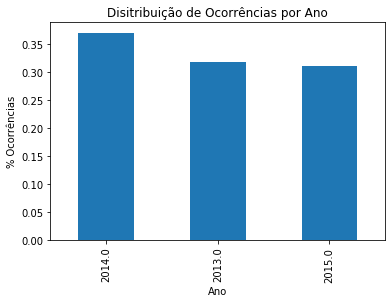

In [36]:
df['ANO_BO'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('% Ocorrências')
plt.xlabel('Ano')
plt.title('Disitribuição de Ocorrências por Ano')
plt.show()

### FEATURE 'MES_OCORRENCIA_BO'

**Distribuição de Ocorrências por Mês**

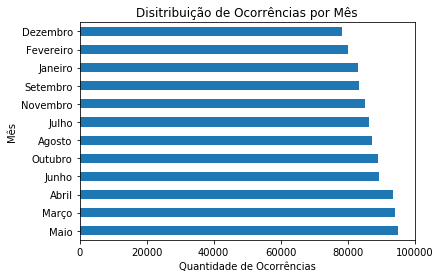

In [59]:
df["MES_OCORRENCIA_BO"].value_counts().plot(kind="barh")
plt.xlim(0, 100000)
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Mês')
plt.title('Disitribuição de Ocorrências por Mês')
plt.show()

### FEATURE 'FLAG_STATUS'

**Distribuição de Ocorrências por Status**

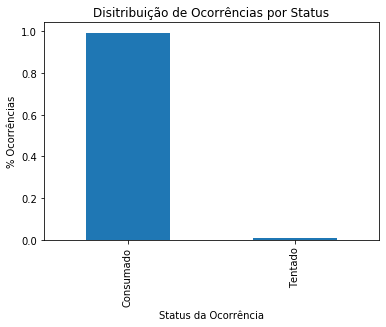

In [62]:
df['FLAG_STATUS'].value_counts(normalize=True).plot(kind="bar")
plt.xlabel('Status da Ocorrência')
plt.ylabel('% Ocorrências')
plt.title('Disitribuição de Ocorrências por Status')
plt.show()

### FEATURE 'RUBRICA'

**Distribuição de Ocorrências por Ato**

In [63]:
df['RUBRICA'].value_counts()

Roubo (art. 157)                                                          472765
Furto (art. 155)                                                          285325
Lesão corporal (art. 129)                                                  83209
Furto qualificado (art. 155, §4o.)                                         78176
Lesão corporal culposa na direção de veículo automotor (Art. 303)          67968
Lesão corporal (art 129 § 9º)                                              20344
Homicídio simples (art. 121)                                                8952
A.I.-Roubo (art. 157)                                                       7703
A.I.-Lesão corporal (art. 129)                                              4287
Estupro de vulneravel (art.217-A)                                           3904
Lesão corporal culposa (art. 129. §6o.)                                     2956
Estupro (art.213)                                                           2141
Homicídio culposo na direção

In [70]:
# AGRUPAMENTO DE ATOS
qtd_roubo = len(df[df['RUBRICA'].str.contains("Roubo")])
qtd_furto = len(df[df['RUBRICA'].str.contains("Furto")])
qtd_lesao_corp = len(df[df['RUBRICA'].str.contains("Lesão corporal")])
qtd_homicidio = len(df[df['RUBRICA'].str.contains("Homicídio")])
qtd_estupro = len(df[df['RUBRICA'].str.contains("Estupro")])

In [72]:
# CHECAGEM DE QUANTIDADE DE REGISTROS
print("Total registros: {}\nTotal agrupado: {}".format(len(df), (qtd_roubo + qtd_furto + qtd_lesao_corp + qtd_homicidio + qtd_estupro)))

Total registros: 1044794
Total agrupado: 1044794


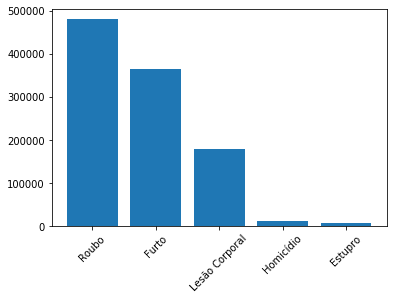

In [79]:
names = ["Roubo", "Furto", "Lesão Corporal", "Homicídio", "Estupro"]
values = [qtd_roubo, qtd_furto, qtd_lesao_corp, qtd_homicidio, qtd_estupro]
plt.bar(names, values)
plt.xticks(rotation=45)
plt.show()

### FEATURE 'DESCR_CONDUTA'

**Distribuição de Ocorrências por Conduta**

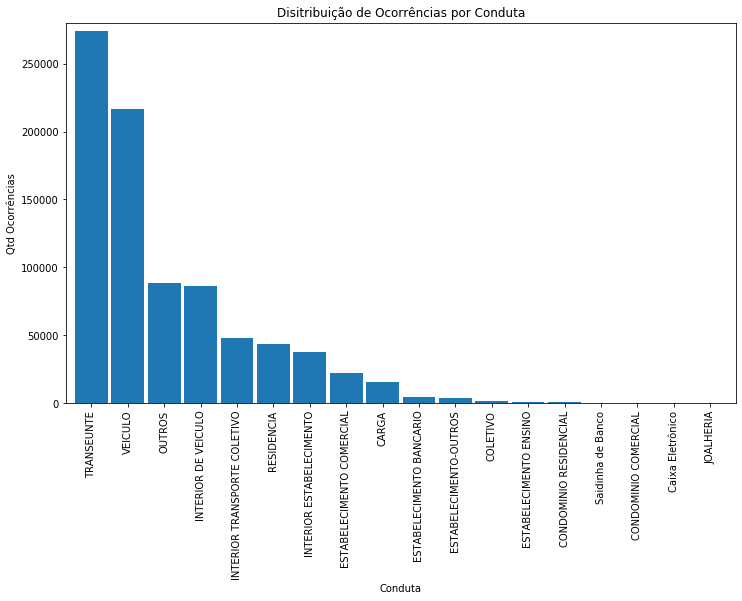

In [109]:
df['DESCR_CONDUTA'].value_counts().plot.bar(width=0.9, figsize=(12,7))
plt.xlabel('Conduta')
plt.ylabel('Qtd Ocorrências')
plt.title('Disitribuição de Ocorrências por Conduta')
plt.ylim(0, 280000)
plt.show()

### FEATURE 'DESCR_TIPOLOCAL'

**Distribuição de Ocorrências por Local**

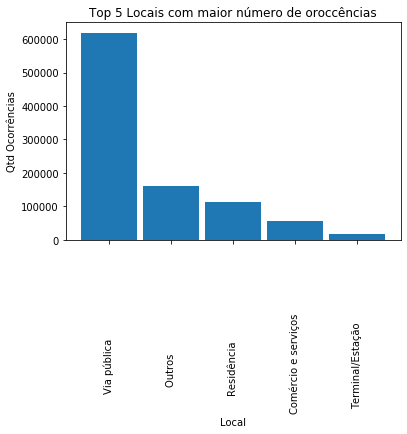

In [119]:
df['DESCR_TIPOLOCAL'].value_counts().head().plot.bar(width=0.9)
plt.xlabel('Local')
plt.ylabel('Qtd Ocorrências')
plt.title('Top 5 Locais com maior número de oroccências')
plt.ylim(0, 650000)
plt.show()

### FEATURE 'DESCR_TIPO_PESSOA'

**Distribuição de Ocorrências por Classificação de pessoa**

In [120]:
df['DESCR_TIPO_PESSOA'].value_counts()

Vítima                  1013499
Autor/Vitima              21640
Adolescente                7004
Criança                    2047
Adolescente Inf/Vit         238
Encontrado                  232
Desaparecido                106
Vítima de Suicídio           28
Name: DESCR_TIPO_PESSOA, dtype: int64

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [ ]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*